# 06_Business_Insights

In this section, we will expend upon the features used by the model and attempt to explain its significance as well as contributions to the pricing model.

Accordingly, in Section Four, we identified the following key features that that are strong predictors of housing price based upon a combination of feature engineering coupled with recursive feature elimination.
 
 $$
 \hat{y} = \beta_0 + \begin{align} \beta_1\textit{(age_since_built)} + \beta_2\textit{(Gr_Liv_Area)} + \beta_3\textit{(Total_Bsmt_SF)} + \beta_4\textit{(house_exter_score)} + \beta_j\textit{(Land_Contour)}_j 
 \end{align}$$ 
 
 Where:
 
 $\textit{house_exter_score}$ = ['Overall Qual'] + ['Overall Cond'] +['Exter Qual'] + ['Exter Cond']
 
| Score  |
| --- |
|age_since_built |
|Total Bsmt SF |
|Land Contour_Lvl |
|house_exter_score |
|Gr Liv Area |
|Land Contour_Low |
|Land Contour_HLS |



In [937]:
# model coefficients
prod_model_rfe

,feature,coefficient
0,Total Bsmt SF,15864.667337
1,Gr Liv Area,30824.380459
2,age_since_built,-20019.703415
3,house_exter_score,25762.168495
4,Land Contour_HLS,48572.704690
5,Land Contour_Low,36453.726086
6,Land Contour_Lvl,12958.893938
7,y_intercept,167047.745662


## Import Libraries

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.ticker as ticker

%matplotlib inline

In [9]:
rfe_columns = ['Total Bsmt SF', 'Gr Liv Area', 'age_since_built', 'house_exter_score',
       'Land Contour_HLS', 'Land Contour_Low', 'Land Contour_Lvl']

## Load in Training Set for Exploration

In [84]:
train = pd.read_csv('./datasets/imputed_train.csv')

In [85]:
new_train = train[(train['Total Bsmt SF']<4000) & (train['Total Bsmt SF']>0)]

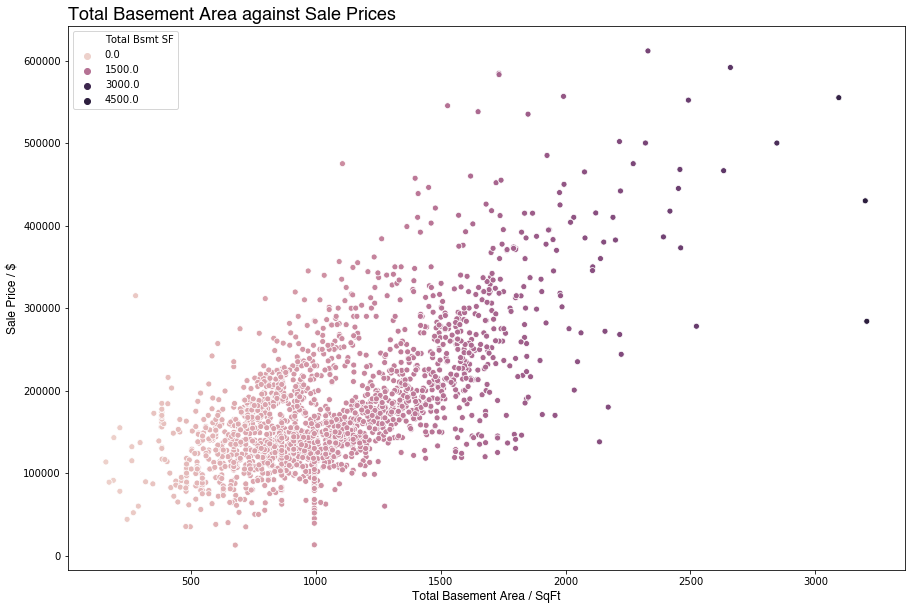

In [86]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='Total Bsmt SF',y='SalePrice',data=new_train,hue='Total Bsmt SF')
ax.set_title("Total Basement Area against Sale Prices", fontname='Helvetica', fontsize=18,loc='left')
ax.set_xlabel('Total Basement Area / SqFt',fontname='Helvetica',fontsize=12)
ax.set_ylabel('Sale Price / $',fontname='Helvetica',fontsize=12)
plt.savefig("./img/bsmt_area.png",dpi=300)

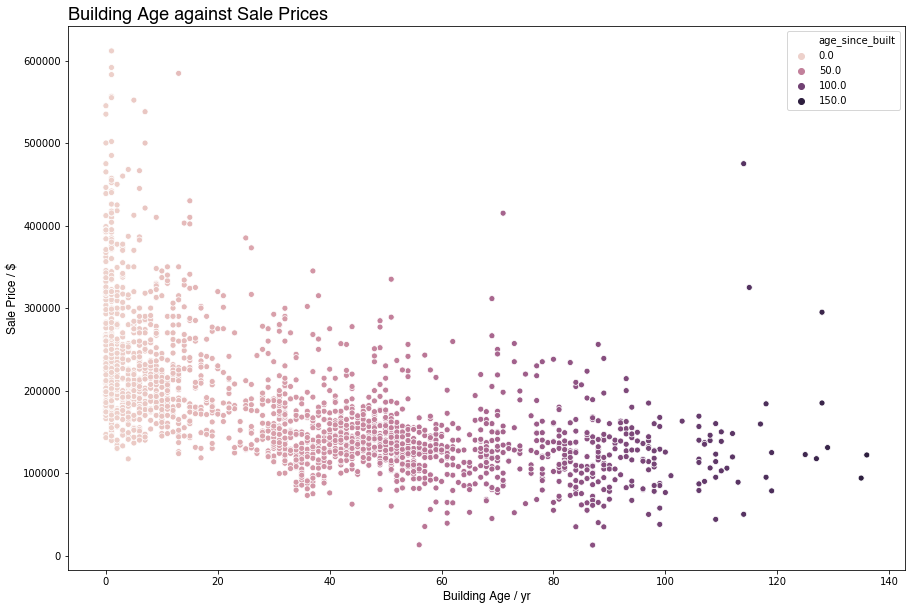

In [87]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='age_since_built',y='SalePrice',data=new_train,hue='age_since_built')
ax.set_title("Building Age against Sale Prices", fontname='Helvetica', fontsize=18,loc='left')
ax.set_xlabel('Building Age / yr',fontname='Helvetica',fontsize=12)
ax.set_ylabel('Sale Price / $',fontname='Helvetica',fontsize=12)
plt.savefig("./img/building_age.png",dpi=300)

In [88]:
train.columns

Index(['Unnamed: 0', 'has_remod', 'Land Contour_HLS', 'Land Contour_Low',
       'Land Contour_Lvl', 'House Style_2Story', 'House Style_Split',
       'Central Air_Y', 'Bedroom AbvGr_1', 'Bedroom AbvGr_2',
       'Bedroom AbvGr_3', 'Bedroom AbvGr_>=4', 'TotRms AbvGrd_6',
       'TotRms AbvGrd_7', 'TotRms AbvGrd_<=4', 'TotRms AbvGrd_>=8',
       'Mo Sold_spring', 'Mo Sold_summer', 'Mo Sold_winter', 'Yr Sold_2007',
       'Yr Sold_2008', 'Yr Sold_2009', 'Yr Sold_2010', 'total_baths_1',
       'total_baths_2', 'total_baths_>=3', 'lot_area_frontage', 'Mas Vnr Area',
       'Total Bsmt SF', 'Gr Liv Area', 'Garage Area', 'outdoor_SF',
       'age_since_remodel', 'age_since_built', 'Heating QC',
       'house_exter_score', 'fireplace_score', 'garage_basement_score',
       'kitchen_score', 'SalePrice'],
      dtype='object')

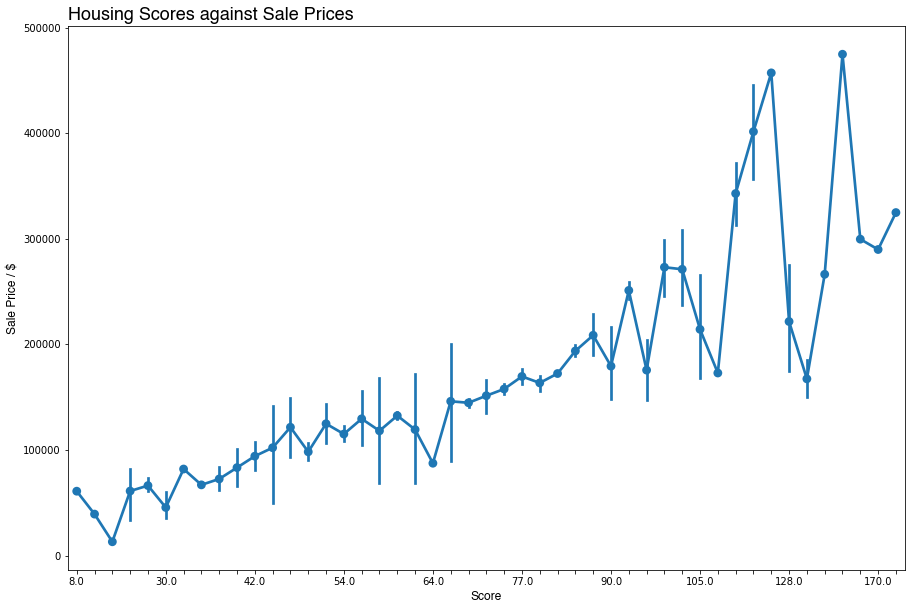

In [159]:
plt.figure(figsize=(15,10))
ax = sns.pointplot(x='house_exter_score',y='SalePrice',data=new_train)
ax.set_title("Housing Scores against Sale Prices", fontname='Helvetica', fontsize=18,loc='left')
ax.set_xlabel('Score',fontname='Helvetica',fontsize=12)
ax.set_ylabel('Sale Price / $',fontname='Helvetica',fontsize=12)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.savefig("./img/housing_score.png",dpi=300)

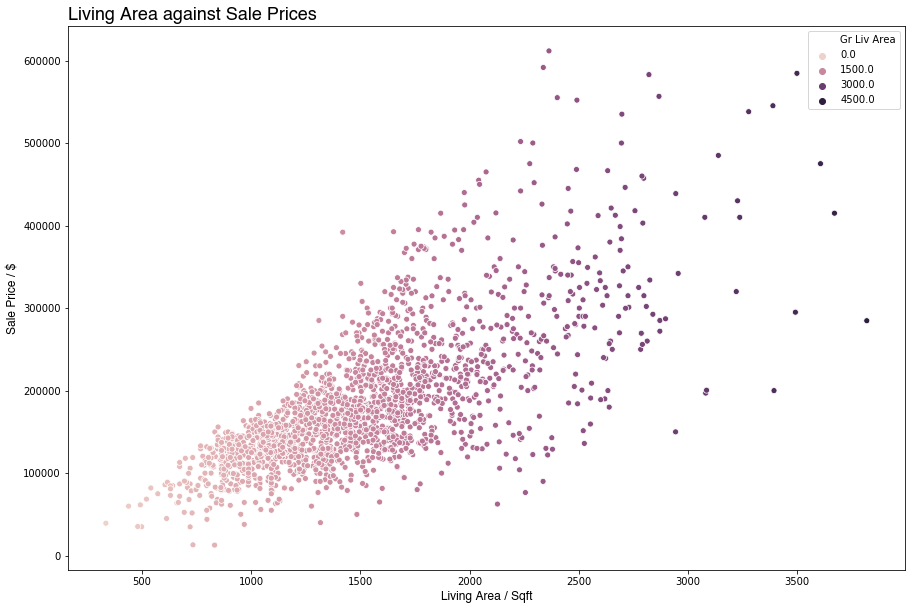

In [125]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=new_train,hue='Gr Liv Area')
ax.set_title("Living Area against Sale Prices", fontname='Helvetica', fontsize=18,loc='left')
ax.set_xlabel('Living Area / Sqft',fontname='Helvetica',fontsize=12)
ax.set_ylabel('Sale Price / $',fontname='Helvetica',fontsize=12)
plt.savefig("./img/living_area.png",dpi=300)

In [109]:
new_train_melt = new_train[['Land Contour_Low', 'Land Contour_HLS','Land Contour_Lvl','SalePrice']].melt(id_vars='SalePrice' ,value_vars=['Land Contour_Low', 'Land Contour_HLS','Land Contour_Lvl'])


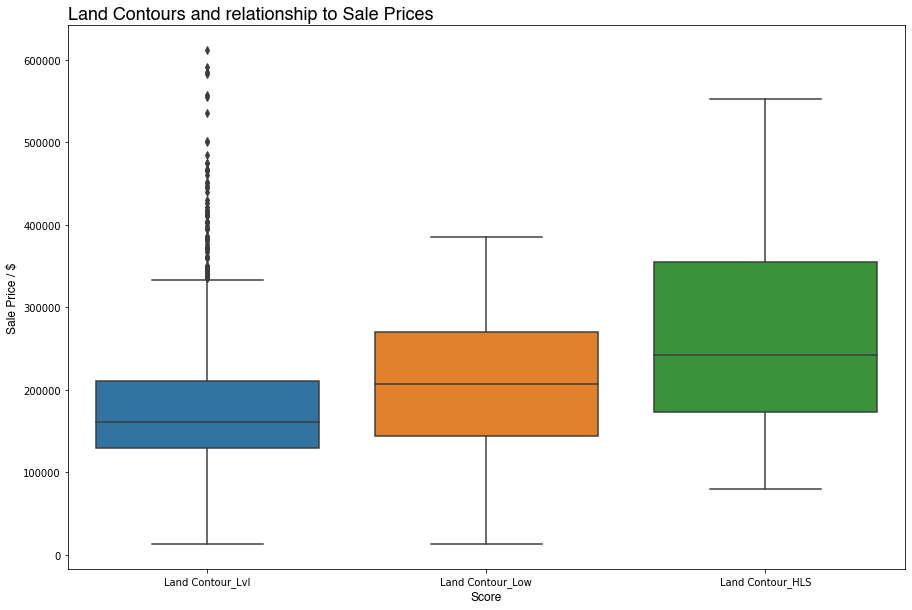

In [132]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='variable',y='SalePrice',order=['Land Contour_Lvl','Land Contour_Low','Land Contour_HLS'],data=new_train_melt[new_train_melt['value']!=0])
ax.set_title("Land Contours and relationship to Sale Prices", fontname='Helvetica', fontsize=18,loc='left')
ax.set_xlabel('Score',fontname='Helvetica',fontsize=12)
ax.set_ylabel('Sale Price / $',fontname='Helvetica',fontsize=12)
plt.savefig("./img/contour_plot.png",dpi=300)


## Key Takeaways

## Conclusion And Recommendations

House age, Land Contours, Housing Scores as well as Gross floor areas are strong predictors of housing prices. Using these few variables, a prospective home seller can look into improving areas such as home quality, condition as well as look at expanding gross floor areas via careful remodelling of their homes.


To make this model location agnostic, we may impute features such as accessibility to the city (via distances) and crime rates which can affect buyer's judgement.